In [1]:
# YOLO  - You only look once - Single stage detector
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
# config file
config_file = ("C:/Users/rupik/Documents/Edu labs/Yolo/yolov3.cfg")
# weights are just like saving already trained model
weights = ("C:/Users/rupik/Documents/Edu labs/Yolo/yolov3.weights")
labels = open("C:/Users/rupik/Documents/Edu labs/Yolo/coco.names").read().strip().split('\n')

In [3]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
# intersecton over union - IOU value is used in object detection
# to measure the overlap of predicted v/s actual box of object
IOU_THRESHOLD = 0.5


In [4]:
# using DNN algo of opencv using load weights of trained model yolov3 model
net = cv2.dnn.readNetFromDarknet(config_file,weights)

In [5]:
#colors to pick for ectangle around the objects
colors = np.random.randint(0,255,size=(len(labels),3),dtype = 'uint8')
colors

array([[  6, 190, 130],
       [221, 187, 195],
       [172,  26, 224],
       [115, 249, 254],
       [ 70,  52, 231],
       [ 55,  22,  74],
       [ 81, 243,  41],
       [ 50,  37,  19],
       [231, 136, 146],
       [ 48, 141, 164],
       [172, 234, 132],
       [227,  93, 105],
       [248, 123, 124],
       [211,  25,  68],
       [ 95,  42, 225],
       [ 85,  89,  57],
       [  0, 103, 158],
       [218, 136, 234],
       [ 57, 144,  67],
       [151,  78,  77],
       [ 28,  73, 149],
       [ 96, 207,  55],
       [ 81, 172,  23],
       [ 49,  81, 216],
       [ 23, 254, 106],
       [ 20, 189, 168],
       [ 37,  75, 191],
       [ 62,  78,  19],
       [159,  80, 176],
       [101, 186, 176],
       [  9, 126, 117],
       [144,  86,   1],
       [193,  30,  37],
       [222, 221,  49],
       [203, 158,   8],
       [ 90, 245, 142],
       [121, 189, 239],
       [ 43,  19, 169],
       [216, 209,  32],
       [253, 176,  72],
       [200, 160, 242],
       [126,   0

In [6]:
# Total number objects detected by DarkNet Model
len(labels)

80

In [10]:
# model 
def model_output(path_name):
    image = cv2.imread(path_name)
    file_name = os.path.basename(path_name)
    #file name and extension
    filename,ext = file_name.split('.')
    h,w = image.shape[:2]
    # preprocessing of image
    blob = cv2.dnn.blobFromImage(image,1/255.0,(416,416),swapRB = True,crop=False)
    # set DNN(Yolo) model layer
    net.setInput(blob)
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    #output layer
    layer_outputs = net.forward(ln)
    boxes,confidences,class_ids = [],[],[]
    
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            # multiclass probability to its class labels [0.05, 0.9, 0.05]: class = 1
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence>CONFIDENCE:
                box = detection[:4]*np.array([w,h,w,h])
                # center coordinates of box , total width of object , total length of object
                (centerX, centerY, width, height) = box.astype("int")
                # start coordinate
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x,y,int(width), int(height)])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    return boxes, confidences, class_ids
    
    

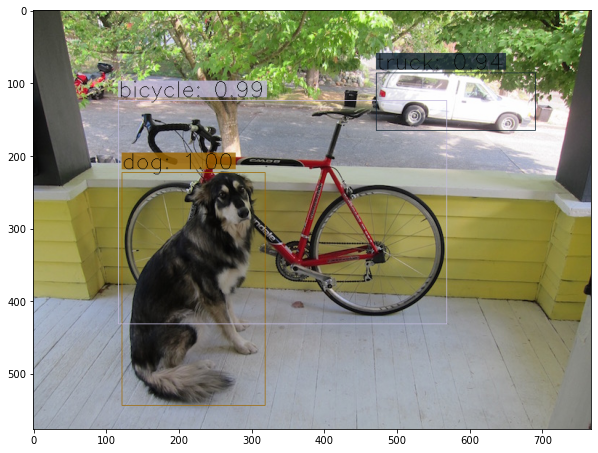

In [11]:
def detection_recognition(path_name):
    image = cv2.imread(path_name)
    boxes, confidences, class_ids = model_output(path_name)
    # Id , Coordinates of Boxes, SCORE_THRESHOLD, IOU_THRESHOLD
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)
    font_scale = 1
    thickness = 1
    # Check if atleast one object is detected
    if len(idxs)>0:
        for i in idxs.flatten():
            x,y = boxes[i][0], boxes[i][1]
            w,h = boxes[i][2], boxes[i][3]
            color = [int(c) for c in colors[class_ids[i]]]
            cv2.rectangle(image, (x,y), (x+w, y+h), color = color, thickness= thickness)
            text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
            (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
            text_offset_x = x
            text_offset_y = y - 5
            box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
            overlay = image.copy()
            cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
            image = cv2.addWeighted(overlay, 0.8, image, 0.2, 0)#add two copies to one and the numbers define blending percent
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=font_scale, color=(0, 0, 0), thickness=thickness)
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

detection_recognition("C:/Users/rupik/Documents/Edu labs/Yolo/dog.jpg")

